# Testing the Emotion Detector model

In [ ]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

## Step 2 - Connecting to Drive and accessing files

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/My Drive/DIO/files.zip"
zip_object = zipfile.ZipFile(file = path, mode = "r")
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/My Drive/DIO/files.zip' mode='r'>>

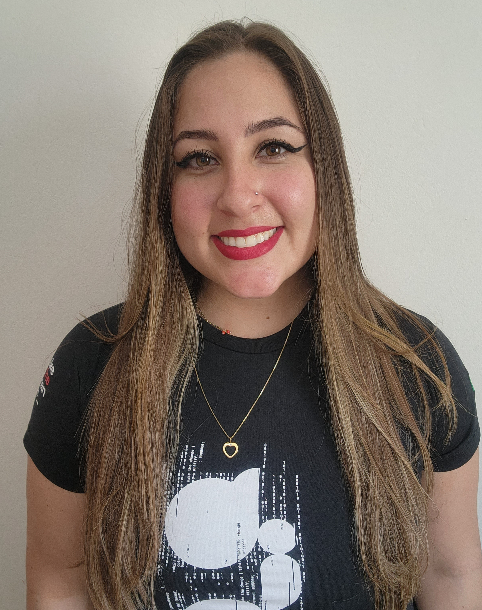

In [ ]:
image = cv2.imread('/content/gdrive/My Drive/DIO/isa.png')
cv2_imshow(image)

In [ ]:
image.shape

(610, 482, 3)

## Testing the Detector

In [ ]:
cascade_faces = "Material/haarcascade_frontalface_default.xml"
model_path = "Material/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
emotions_classifier = load_model(model_path, compile = False)
expressions = ["Anger", "Disgust", "Fear", "Happy", "Sad", "Surprised", "Neutral"]

##Face detection

In [ ]:
original = image.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20,20))

In [ ]:
faces

array([[136,  76, 208, 208]], dtype=int32)

In [ ]:
len(faces)

1

In [ ]:
faces.shape

(1, 4)

## Extraction of ROI (region of interest)

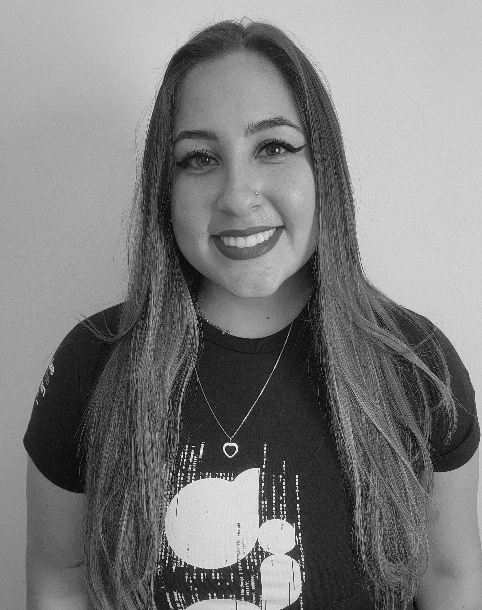

In [ ]:
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
gray.shape

(610, 482)

In [ ]:
roi = gray[40:40 + 230, 162:162 + 140]


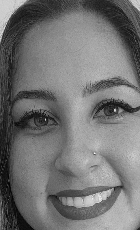

In [ ]:
cv2_imshow(roi)

In [ ]:
roi.shape

(230, 140)

array([[206, 204, 199, ..., 205, 203, 194],
       [206, 207, 202, ..., 187, 204, 199],
       [207, 208, 199, ..., 183, 196, 209],
       ...,
       [103,  82, 109, ..., 105,  98,  54],
       [102,  83, 129, ...,  96,  38,  37],
       [ 99,  81,  82, ...,  43,  35,  35]], dtype=uint8)
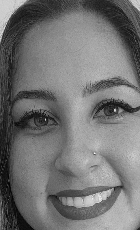

In [ ]:
roi

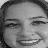

In [ ]:
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [ ]:
roi.dtype

dtype('uint8')

In [ ]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [ ]:
roi

array([[208., 204., 207., ..., 208., 201., 197.],
       [203., 206., 209., ...,  79., 168., 188.],
       [203., 204., 203., ...,  98.,  75.,  95.],
       ...,
       [ 85.,  49.,  30., ..., 181., 167., 155.],
       [ 85.,  57.,  31., ..., 170., 162., 136.],
       [ 83.,  78.,  69., ..., 159., 128.,  90.]])

In [ ]:
roi = roi / 255

In [ ]:
roi

array([[0.81568627, 0.8       , 0.81176471, ..., 0.81568627, 0.78823529,
        0.77254902],
       [0.79607843, 0.80784314, 0.81960784, ..., 0.30980392, 0.65882353,
        0.7372549 ],
       [0.79607843, 0.8       , 0.79607843, ..., 0.38431373, 0.29411765,
        0.37254902],
       ...,
       [0.33333333, 0.19215686, 0.11764706, ..., 0.70980392, 0.65490196,
        0.60784314],
       [0.33333333, 0.22352941, 0.12156863, ..., 0.66666667, 0.63529412,
        0.53333333],
       [0.3254902 , 0.30588235, 0.27058824, ..., 0.62352941, 0.50196078,
        0.35294118]])

In [ ]:
roi = img_to_array(roi)

In [ ]:
roi

array([[[0.8156863 ],
        [0.8       ],
        [0.8117647 ],
        ...,
        [0.8156863 ],
        [0.7882353 ],
        [0.77254903]],

       [[0.79607844],
        [0.80784315],
        [0.81960785],
        ...,
        [0.30980393],
        [0.65882355],
        [0.7372549 ]],

       [[0.79607844],
        [0.8       ],
        [0.79607844],
        ...,
        [0.38431373],
        [0.29411766],
        [0.37254903]],

       ...,

       [[0.33333334],
        [0.19215687],
        [0.11764706],
        ...,
        [0.70980394],
        [0.654902  ],
        [0.60784316]],

       [[0.33333334],
        [0.22352941],
        [0.12156863],
        ...,
        [0.6666667 ],
        [0.63529414],
        [0.53333336]],

       [[0.3254902 ],
        [0.30588236],
        [0.27058825],
        ...,
        [0.62352943],
        [0.5019608 ],
        [0.3529412 ]]], dtype=float32)

In [ ]:
roi.shape

(48, 48, 1)

In [ ]:
roi = np.expand_dims(roi, axis = 0)

In [ ]:
roi.shape

(1, 48, 48, 1)

### Predictions

In [ ]:
predsim = emotions_classifier.predict(roi)[0]

1/1 [==============================] - 0s 231ms/step


In [ ]:
preds

array([1.0912774e-09, 2.4678736e-16, 2.8519698e-09, 9.9999893e-01,
       2.7219969e-09, 4.5167967e-09, 1.0444865e-06], dtype=float32)

In [ ]:
len(preds)

7

In [ ]:
emotion_probability = np.max(preds)
emotion_probability

0.9999989

In [ ]:
preds.argmax()

3

In [ ]:
label = expressions[preds.argmax()]
label

'Happy'

### Results

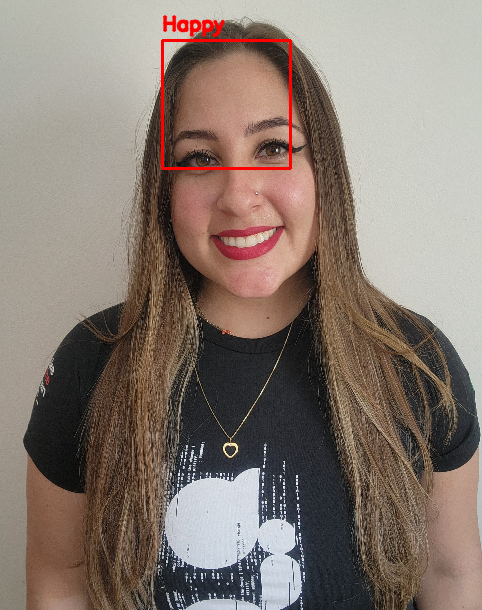

In [ ]:
cv2.putText(original, label, (162, 40 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2)
cv2_imshow(original)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
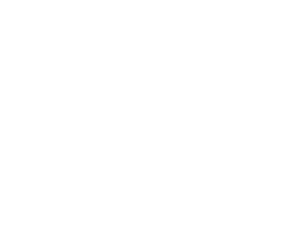

In [ ]:
probabilidades = np.ones((250,300,3), dtype= 'uint8') * 255
probabilidades

In [ ]:
probabilidades.shape

(250, 300, 3)

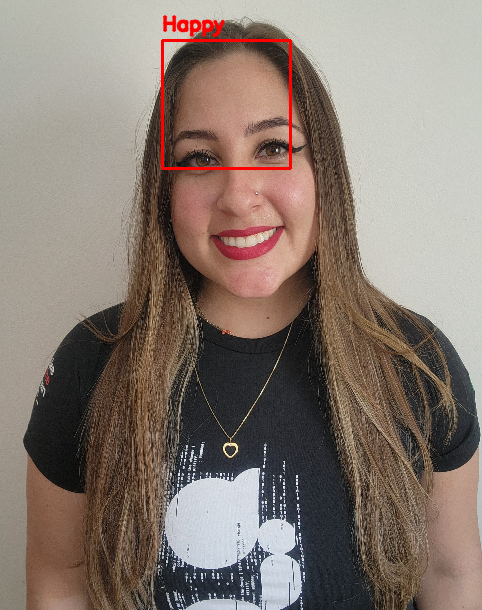

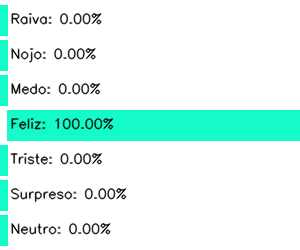

In [ ]:
cv2_imshow(original)
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
    #print(i, emotion, prob)
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
cv2_imshow(probabilidades)